# Evaluation of single-cell experiments

The purpose of this notebook is to create plots for the single-cell experiments were we analyze the optimal treatments for various values of lambda.

In [1]:
# Adapt path to allow imports from project
import os
os.chdir("..")

In [2]:
import time
from src.baseline.evaluate import build_combined_single_frame, build_combined_dual_frame, best_single_treatment, best_dual_treatment
from src.baseline.evaluate import best_single_treatment_by_dosage, best_dual_treatment_by_dosage
from src.search.evaluate_search import best_single_search_result
from src.env.cell_lines import retrieve_lines

In [3]:
%pylab inline
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['ptm', 'Helvetica', 'Times New Roman']

Populating the interactive namespace from numpy and matplotlib


#### Configuration

In [4]:
# param for retrieval
LAMBDAS = np.arange(-7.0, -1.0 + 0.01, 1.0
DOMAIN = "simplex"
OBJ = "worst"

In [5]:
# meta
PATH_EVAL = "./artifacts/evaluation/single/"
PATH_DATA = "./artifacts/single/"
TISSUE = "pancreas"
# TISSUE = "intestine"
THRESHOLD = 8000
VERIFICATION = False

#### Prepare Data

In [6]:
# functions for data retrieval

def get_data_search(cell_line):
    lambdas, proliferations, objectives, concentrations, treatments = [], [], [], [], []
    for la in LAMBDAS:
        # prepare prefix
        if la == 12345:
            lambd = 0
            prefix = DOMAIN + "_" + "prolif" + "_cma_es" # create prefix here and then give it to function
        else: 
            prefix = DOMAIN + "_" + str(la).replace(".", "_") + "_cma_es" # create prefix here and then give it to function
            lambd = 10 ** la
        treat, o_dos, o_pro, o_obj = best_single_search_result(cell_line, PATH_DATA, prefix, lambd=lambd, max_dosage=THRESHOLD, verification=VERIFICATION)
        lambdas.append(lambd)
        proliferations.append(o_pro)
        objectives.append(o_obj)
        concentrations.append(o_dos)
        treatments.append(treat)
        
        if len(proliferations) % 5 == 0:
            print("   ...%2d lambdas loaded..." % len(lambdas))
    return lambdas, proliferations, objectives, concentrations, treatments

def get_data_single(cell_line, lambdas):
    comb_data = build_combined_single_frame([cell_line])
    proliferations, objectives, concentrations = [], [], []
    for lambd in lambdas:
        treat, s_dos, s_pro, s_obj = best_single_treatment([cell_line], lambd=lambd, obj=OBJ, max_dosage=THRESHOLD, verification=VERIFICATION, comb_data=comb_data)
        proliferations.append(s_pro)
        objectives.append(s_obj)
        concentrations.append(s_dos)
        
        if len(proliferations) % 5 == 0:
            print("   ...%2d out of %d lambdas loaded..." % (len(proliferations), len(lambdas)))
    return proliferations, objectives, concentrations
    
def get_data_dual(cell_line, lambdas):
    comb_data = build_combined_dual_frame([cell_line])
    proliferations, objectives, concentrations = [], [], []
    for lambd in lambdas:
        treat, d_dos, d_pro, d_obj = best_dual_treatment([cell_line], lambd=lambd, obj=OBJ, max_dosage=THRESHOLD, verification=VERIFICATION, comb_data=comb_data)
        proliferations.append(d_pro)
        objectives.append(d_obj)
        concentrations.append(d_dos)
        
        if len(proliferations) % 5 == 0:
            print("   ...%2d out of %d lambdas loaded..." % (len(proliferations), len(lambdas)))
    return proliferations, objectives, concentrations


In [7]:
cell_lines = retrieve_lines(TISSUE)
cell_lines

['A2058',
 'C32',
 'COLO679',
 'HMCB',
 'HT144',
 'K029AX',
 'MDAMB435S',
 'MELHO',
 'RPMI7951',
 'SKMEL24',
 'SKMEL30',
 'UACC257',
 'UACC62',
 'WM115',
 'WM1799',
 'WM2664',
 'WM793',
 'WM88',
 'WM983B']


A2058
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.91  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.68  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  5.87  seconds
Retrieving: All Single drug results
Total time:  8.15  seconds
Retrieving: All Dual drug results
Total time:  8.41  seconds


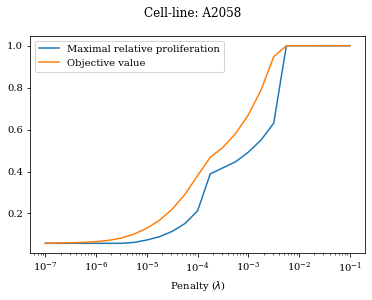

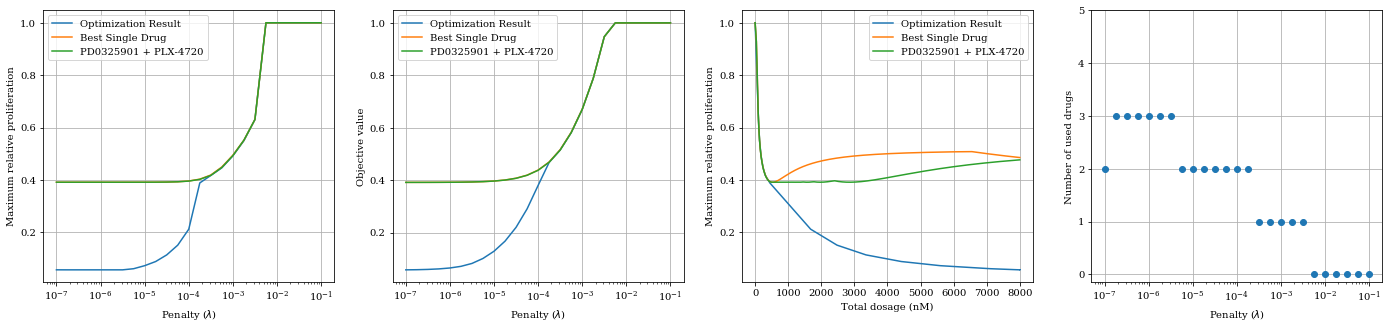


C32
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.62  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.71  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  5.96  seconds
Retrieving: All Single drug results
Total time:  8.23  seconds
Retrieving: All Dual drug results
Total time:  7.56  seconds


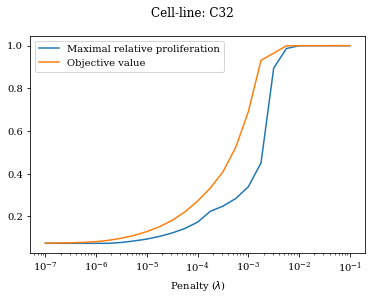

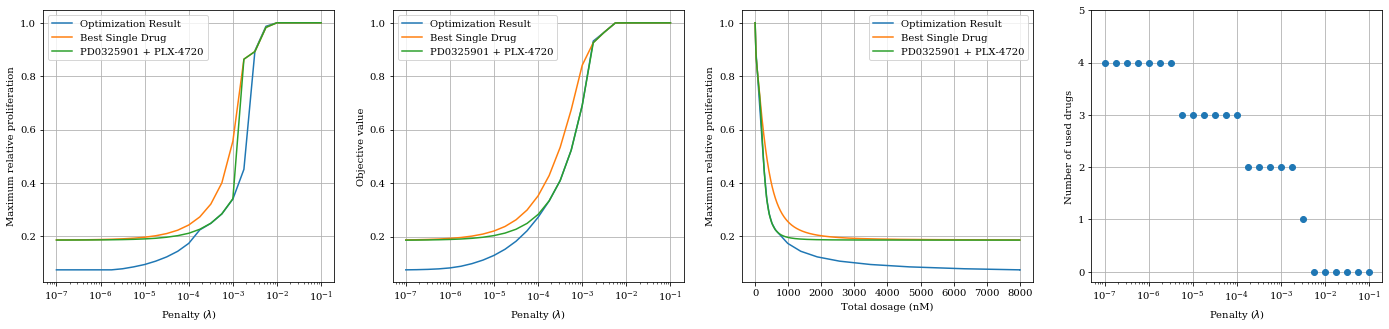


COLO679
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.78  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.66  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  5.89  seconds
Retrieving: All Single drug results
Total time:  8.15  seconds
Retrieving: All Dual drug results
Total time:  7.64  seconds


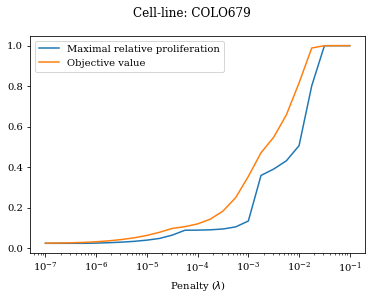

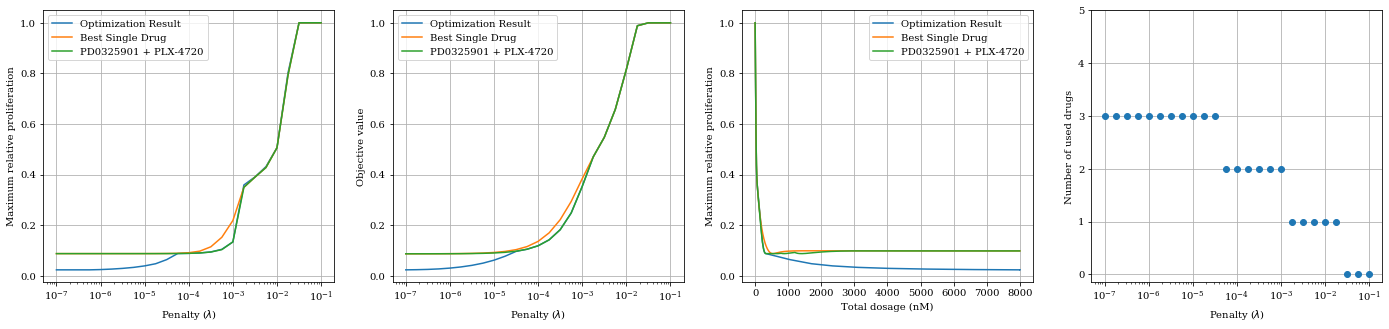


HMCB
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.67  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.73  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  5.99  seconds
Retrieving: All Single drug results
Total time:  8.25  seconds
Retrieving: All Dual drug results
Total time:  6.61  seconds


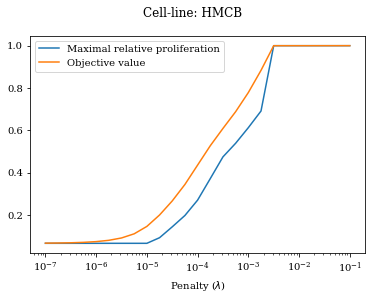

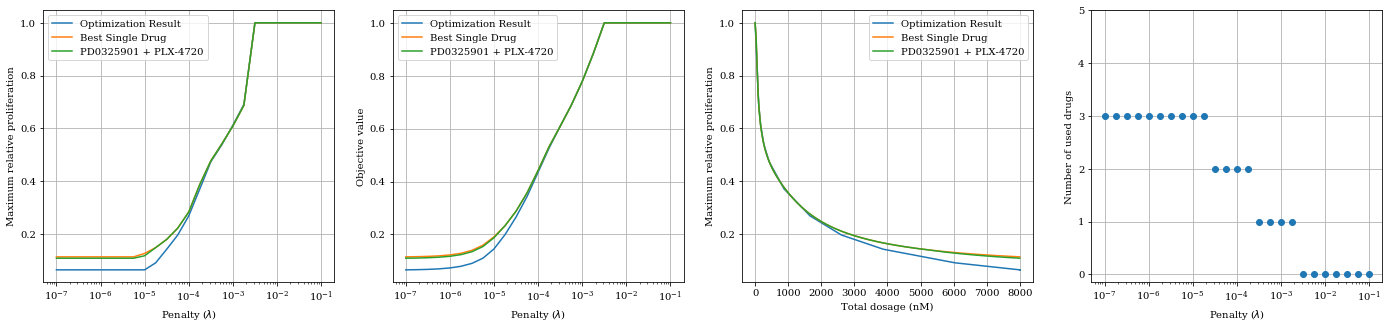


HT144
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.74  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.73  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  5.99  seconds
Retrieving: All Single drug results
Total time:  8.24  seconds
Retrieving: All Dual drug results
Total time:  7.48  seconds


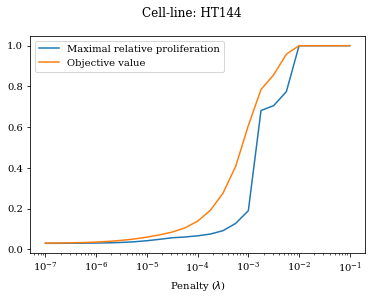

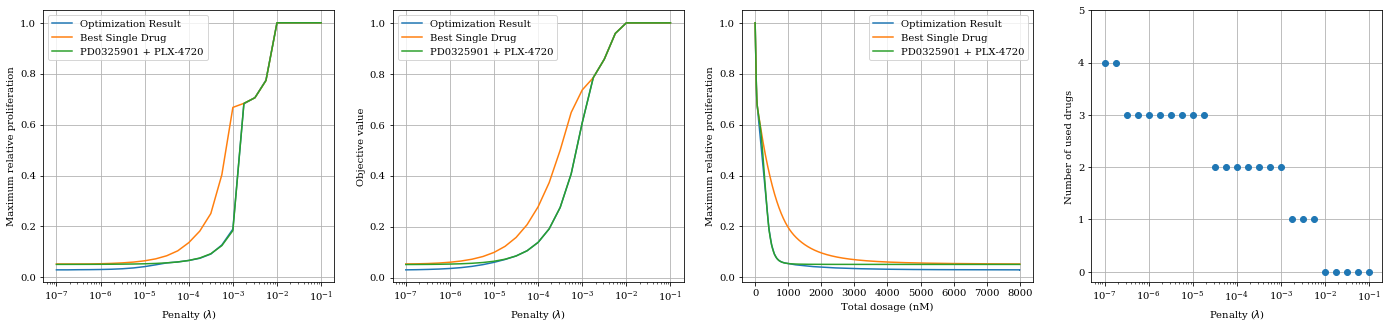


K029AX
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.57  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.75  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.11  seconds
Retrieving: All Single drug results
Total time:  8.36  seconds
Retrieving: All Dual drug results
Total time:  7.26  seconds


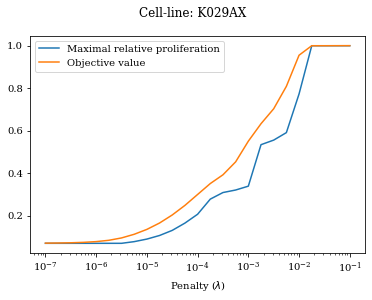

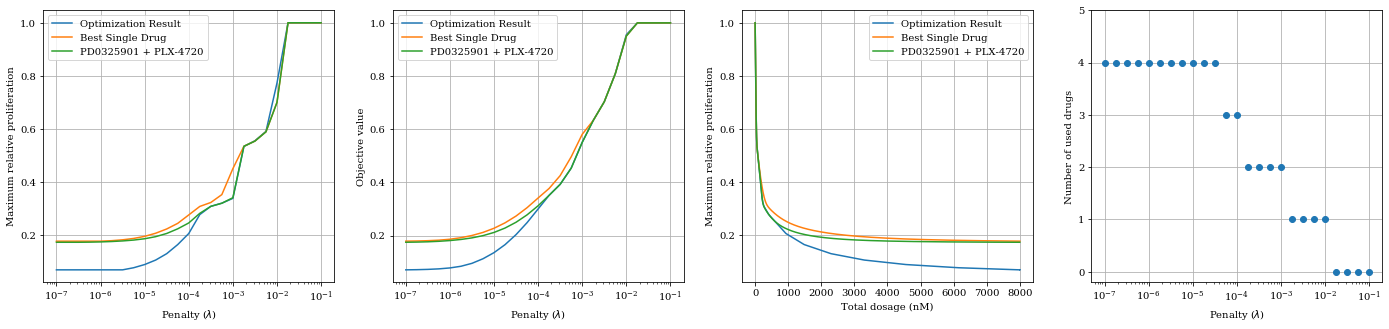


MDAMB435S
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.73  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.75  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.08  seconds
Retrieving: All Single drug results
Total time:  8.35  seconds
Retrieving: All Dual drug results
Total time:  8.41  seconds


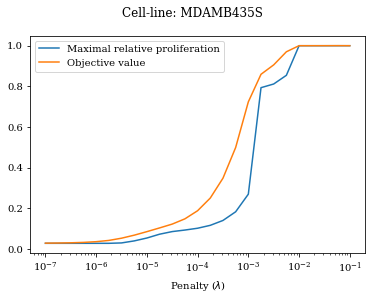

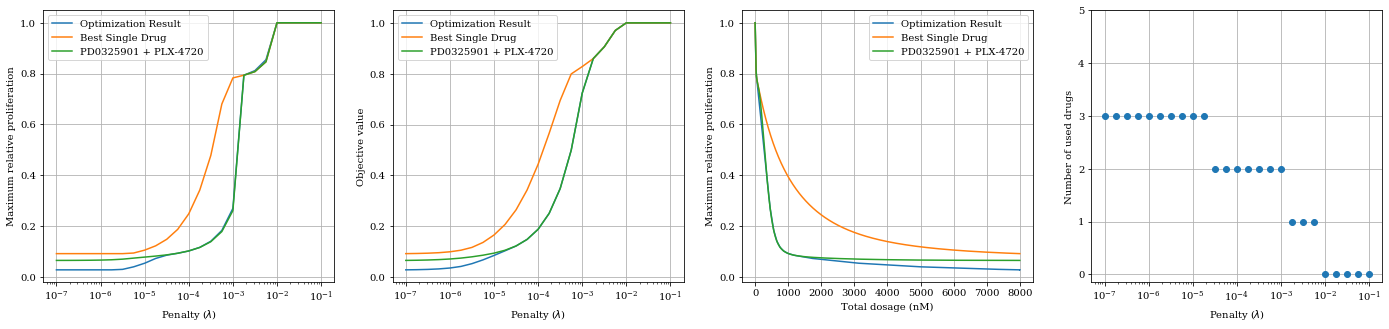


MELHO
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.63  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.74  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.08  seconds
Retrieving: All Single drug results
Total time:  8.32  seconds
Retrieving: All Dual drug results
Total time:  7.56  seconds


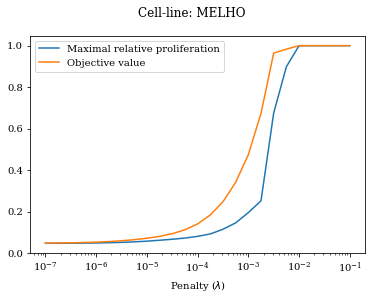

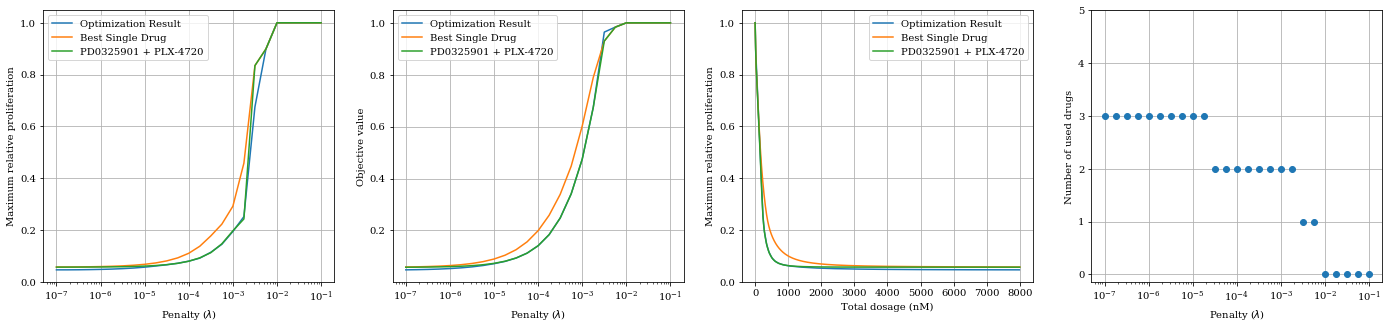


RPMI7951
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.69  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.74  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.02  seconds
Retrieving: All Single drug results
Total time:  8.27  seconds
Retrieving: All Dual drug results
Total time:  6.67  seconds


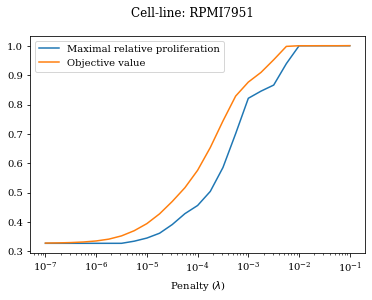

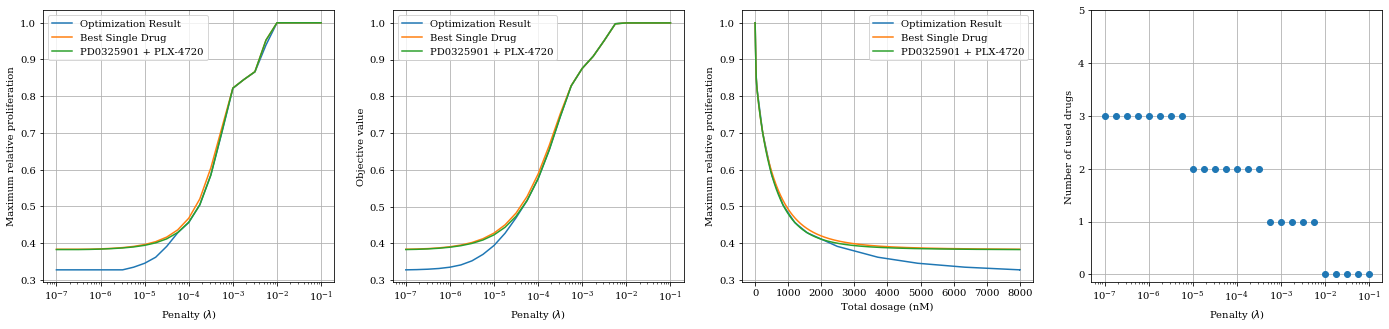


SKMEL24
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.85  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.75  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.04  seconds
Retrieving: All Single drug results
Total time:  8.28  seconds
Retrieving: All Dual drug results
Total time:  7.33  seconds


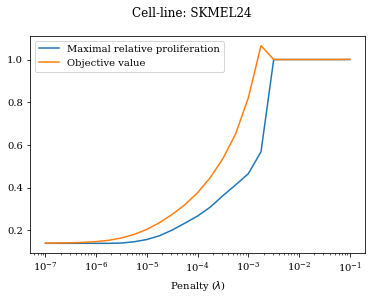

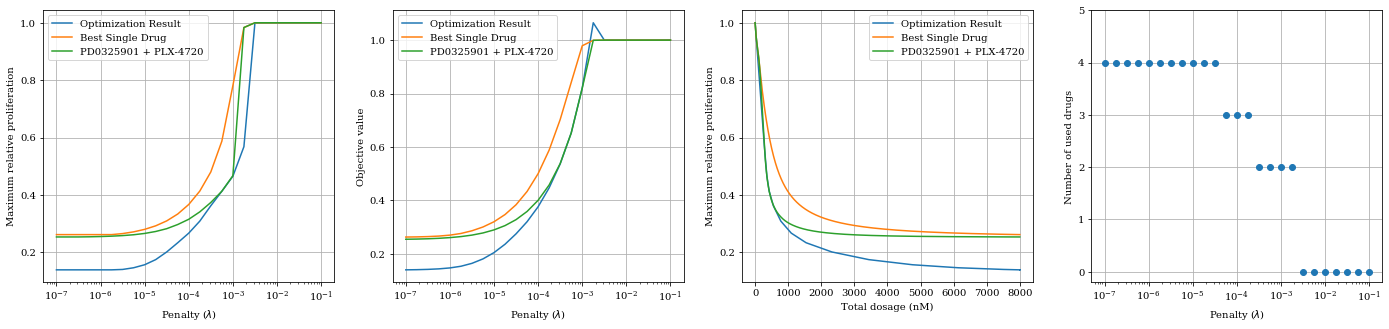


SKMEL30
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.57  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.76  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.15  seconds
Retrieving: All Single drug results
Total time:  8.39  seconds
Retrieving: All Dual drug results
Total time:  6.51  seconds


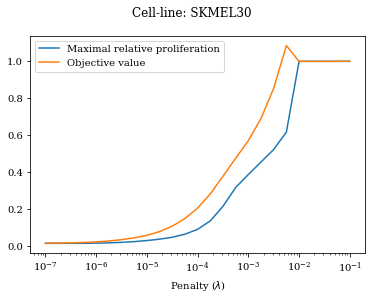

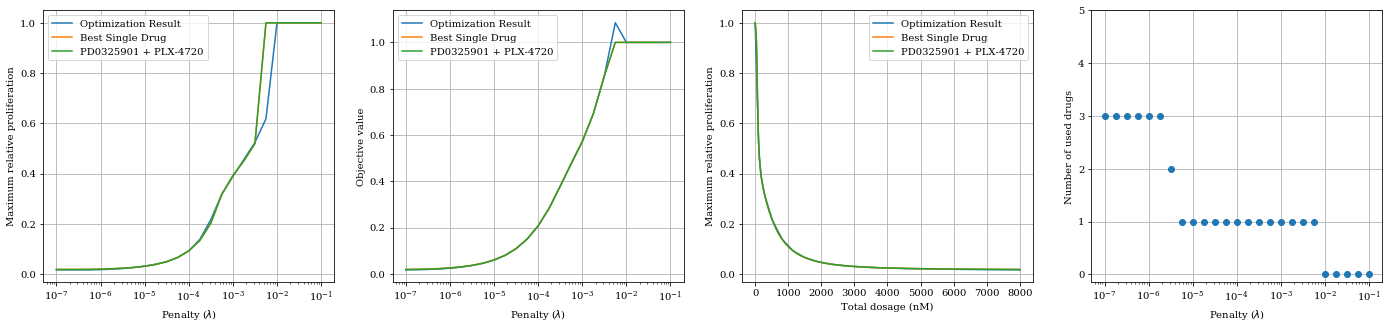


UACC257
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.77  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.76  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.11  seconds
Retrieving: All Single drug results
Total time:  8.36  seconds
Retrieving: All Dual drug results
Total time:  6.97  seconds


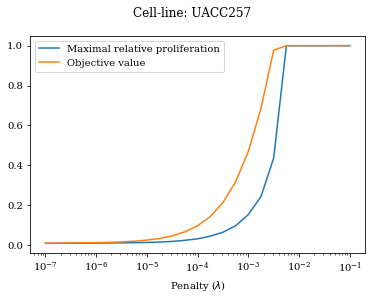

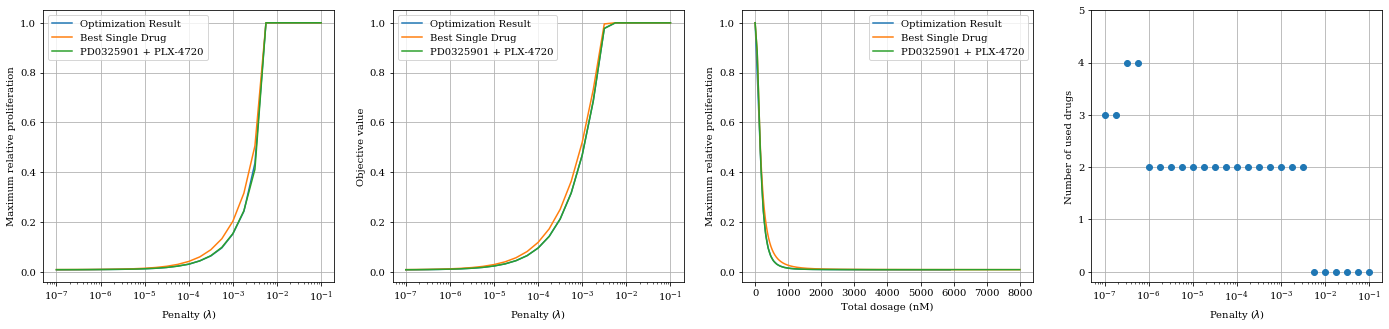


UACC62
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.65  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.74  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.1  seconds
Retrieving: All Single drug results
Total time:  8.36  seconds
Retrieving: All Dual drug results
Total time:  7.56  seconds


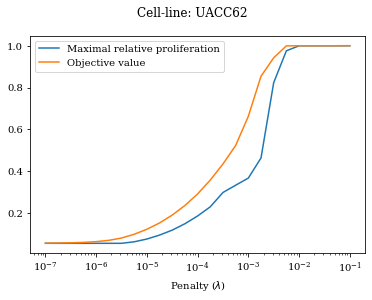

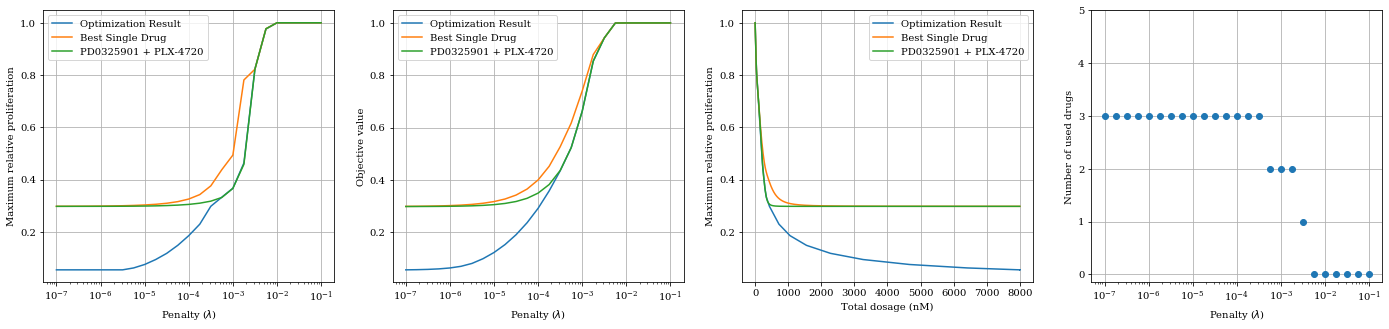


WM115
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.58  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.73  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.12  seconds
Retrieving: All Single drug results
Total time:  8.37  seconds
Retrieving: All Dual drug results
Total time:  6.38  seconds


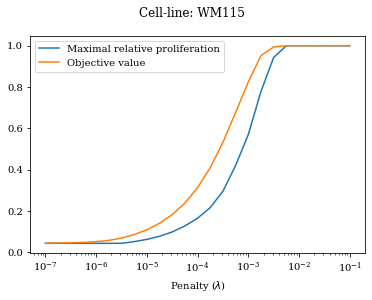

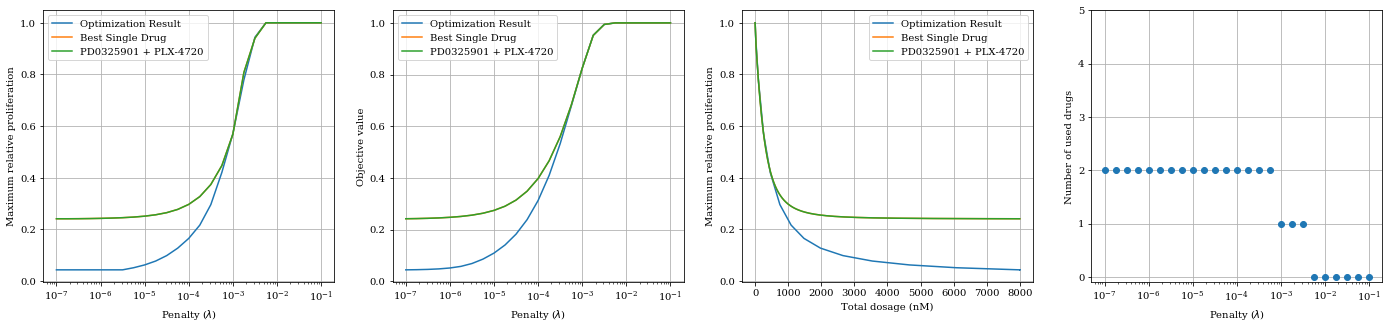


WM1799
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.51  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.73  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  5.93  seconds
Retrieving: All Single drug results
Total time:  8.19  seconds
Retrieving: All Dual drug results
Total time:  7.3  seconds


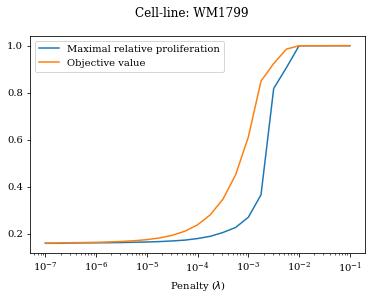

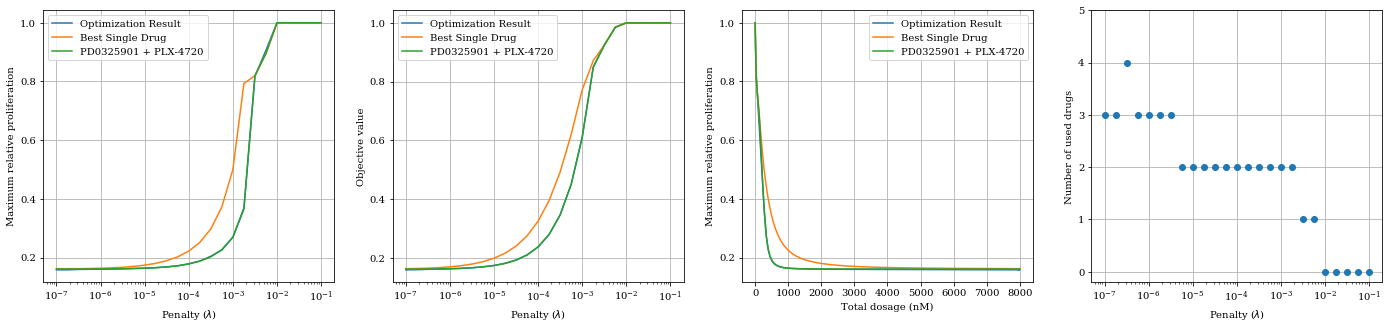


WM2664
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.74  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.72  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.01  seconds
Retrieving: All Single drug results
Total time:  8.26  seconds
Retrieving: All Dual drug results
Total time:  6.57  seconds


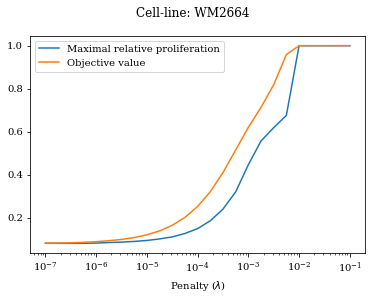

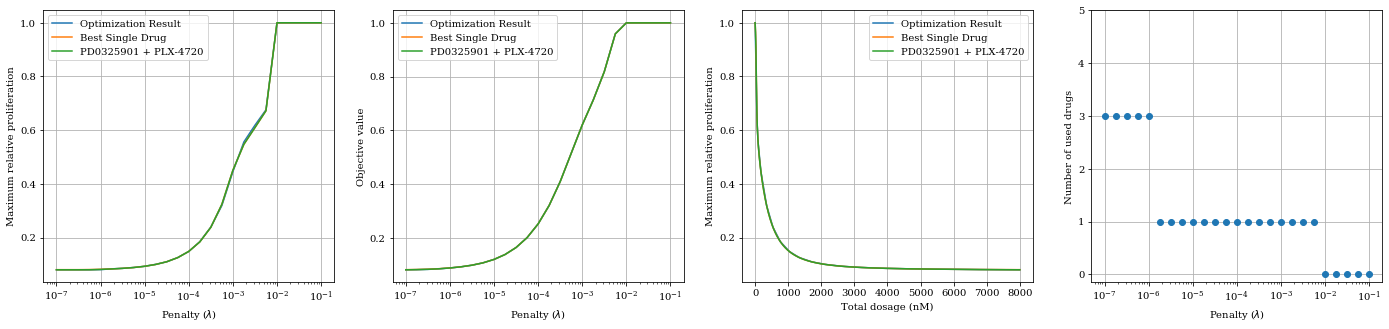


WM793
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.62  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.74  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.02  seconds
Retrieving: All Single drug results
Total time:  8.28  seconds
Retrieving: All Dual drug results
Total time:  7.36  seconds


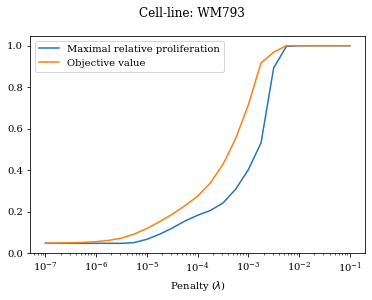

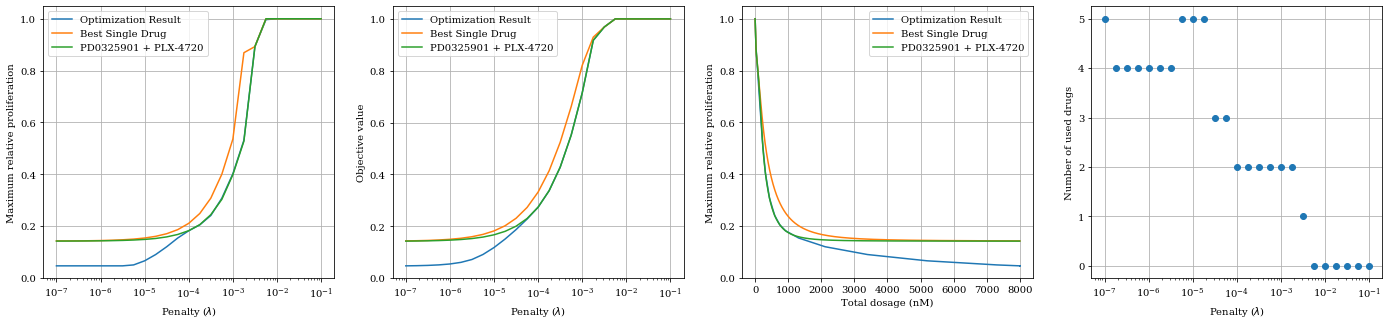


WM88
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.59  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.7  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.0  seconds
Retrieving: All Single drug results
Total time:  8.24  seconds
Retrieving: All Dual drug results
Total time:  7.62  seconds


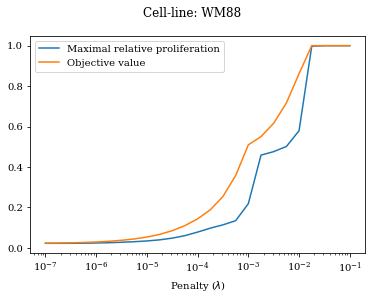

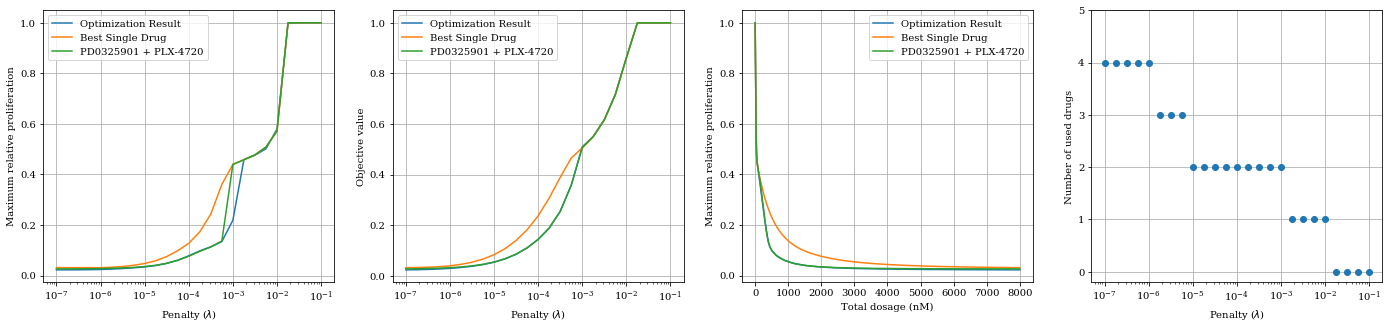


WM983B
-----------------------
Retrieving: Search results
   ... 5 lambdas loaded...
   ...10 lambdas loaded...
   ...15 lambdas loaded...
   ...20 lambdas loaded...
   ...25 lambdas loaded...
Total time:  0.64  seconds
Retrieving: Single drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  1.75  seconds
Retrieving: Dual drug results
   ... 5 out of 25 lambdas loaded...
   ...10 out of 25 lambdas loaded...
   ...15 out of 25 lambdas loaded...
   ...20 out of 25 lambdas loaded...
   ...25 out of 25 lambdas loaded...
Total time:  6.15  seconds
Retrieving: All Single drug results
Total time:  8.4  seconds
Retrieving: All Dual drug results
Total time:  6.76  seconds


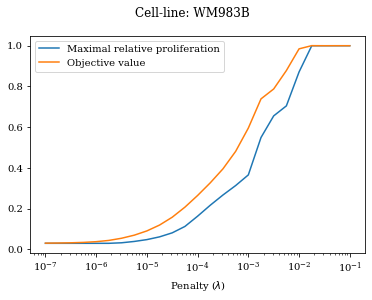

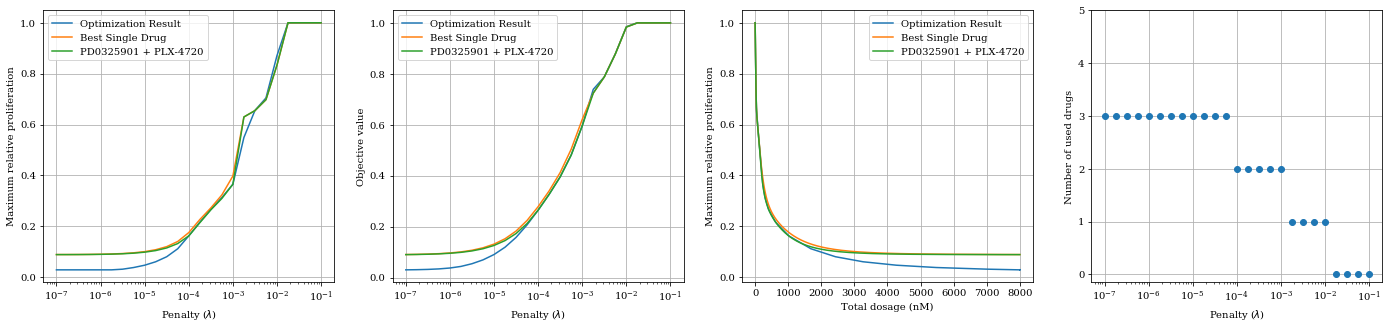

In [8]:
# TODO: Save everything into single pdf
for cell_line in cell_lines:
    print("")
    print(cell_line)
    print("-----------------------")
    t0 = time.time()
    print("Retrieving: Search results")
    lambdas, search_prolifs, search_objectives, search_concentration, search_treatments = get_data_search(cell_line)
    print("Total time: ", round(time.time() - t0, 2), " seconds")
    t0 = time.time()   
    print("Retrieving: Single drug results")
    single_prolifs, single_objectives, single_concentration = get_data_single(cell_line, lambdas)
    print("Total time: ", round(time.time() - t0, 2), " seconds")
    t0 = time.time()
    print("Retrieving: Dual drug results")
    dual_prolifs, dual_objectives, dual_concentration = get_data_dual(cell_line, lambdas)
    print("Total time: ", round(time.time() - t0, 2), " seconds")
    
    print("Retrieving: All Single drug results")
    best_drugs, single_all_concentrations, single_all_prolifs = best_single_treatment_by_dosage([cell_line], obj=OBJ, path="./artifacts/baselines/")
    print("Total time: ", round(time.time() - t0, 2), " seconds")
    t0 = time.time()

    print("Retrieving: All Dual drug results")
    best_ratios, dual_all_concentrations, dual_all_prolifs = best_dual_treatment_by_dosage([cell_line], obj=OBJ, path="./artifacts/baselines/")
    print("Total time: ", round(time.time() - t0, 2), " seconds")

    
    # analyze number of used drugs
    thres_abs = 10
    thres_percent = 5
    n_drugs = []

    # determine number following criteria
    for i, treat in enumerate(search_treatments):
        n_drugs.append(0)
        for k in treat:
            if treat[k] >= thres_abs and (treat[k] / search_concentration[i]) * 100 >= thres_percent:
                n_drugs[-1] += 1
                
    # visualize dependence of objective and achieved proliferation for search results 
    fig, ax = plt.subplots()
    fig.suptitle('Cell-line: ' + cell_line)
    l1, = ax.plot(lambdas, search_prolifs)
    l1.set_label("Maximal relative proliferation")
    l2, = ax.plot(lambdas, search_objectives)
    l2.set_label("Objective value")
    ax.set_xscale('log')
    ax.set_xlabel("Penalty ($\\lambda$)")
    #ax.set_ylabel("Relative proliferation and Objective value")
    ax.legend()
    plt.show()
    
    # ---------------------------------------------------------------------
    # compare search with baselines with proliferation and objective value
    # ---------------------------------------------------------------------
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,5)) # 4x1 format
    # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13,8)) # 2x2 format
    # fig.suptitle('Results single-cell experiment: ' + cell_line)
    # fig.suptitle('Cell-line: ' + cell_line + " (" + TISSUE + ")")

    l1, = ax1.plot(lambdas, search_prolifs)
    l1.set_label("Optimization Result")
    l2, = ax1.plot(lambdas, single_prolifs)
    l2.set_label("Best Single Drug")
    l3, = ax1.plot(lambdas, dual_prolifs)
    l3.set_label("PD0325901 + PLX-4720")

    l4, = ax2.plot(lambdas, search_objectives)
    l4.set_label("Optimization Result")
    l5, = ax2.plot(lambdas, single_objectives)
    l5.set_label("Best Single Drug")
    l6, = ax2.plot(lambdas, dual_objectives)
    l6.set_label("PD0325901 + PLX-4720")
    
    l7, = ax3.plot(search_concentration, search_prolifs)
    l7.set_label("Optimization Result")
    l8, = ax3.plot(single_all_concentrations, single_all_prolifs) # TODO: Modify
    l8.set_label("Best Single Drug")
    l9, = ax3.plot(dual_all_concentrations, dual_all_prolifs) # TODO: Modify
    l9.set_label("PD0325901 + PLX-4720")


    l10, = ax4.plot(lambdas, n_drugs, "o")
    l10.set_label("Optimization result")

    ax1.set_xscale('log')
    ax1.set_xlabel("Penalty ($\\lambda$)")
    ax1.set_ylabel("Maximum relative proliferation")
    ax1.legend()
    ax1.grid(True)

    ax2.set_xscale('log')
    ax2.set_xlabel("Penalty ($\\lambda$)")
    ax2.set_ylabel("Objective value")
    ax2.legend()
    ax2.grid(True)

    ax3.set_xlabel("Total dosage (nM)")
    ax3.set_ylabel("Maximum relative proliferation")
    ax3.set_xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
    ax3.legend()
    ax3.grid(True)

    ax4.set_xscale('log')
    ax4.set_xlabel("Penalty ($\\lambda$)")
    ax4.set_ylabel("Number of used drugs")
    ax4.set_yticks([0, 1, 2, 3, 4, 5])
    ax4.grid(True)

    plt.savefig("./notebooks/plots/single_" + cell_line +  ".pdf", bbox_inches = 'tight')
    plt.savefig("./notebooks/plots/single_" + cell_line +  ".png")
    plt.show()
    

In [9]:
# TODO: investigate number of used drugs in above code